In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [8]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.0.0
accelerate                   0.29.2
aiohttp                      3.9.3
aiosignal                    1.3.1
altgraph                     0.17.2
anyio                        4.3.0
appnope                      0.1.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.7.2
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.7.0
boto3                        1.34.81
botocore                     1.34.81
Brotli                       1.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                        

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = "data"

In [6]:
image_exts = {"png", "jpg", "jpeg", "bmp"}

In [7]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # Check if it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                img_type = imghdr.what(image_path)
                if img_type not in image_exts:
                    print(f"Image not in ext list {image_path}")
                    os.remove(image_path)
            except Exception as e:
                print(f"Issue with image {image_path}")
                # Optionally remove the problematic file
                # os.remove(image_path)

Image not in ext list data/ok/Transparent20Png20image20of20Coca20Cola_1648123681_1253214909.webp
Image not in ext list data/ok/Pepsi-Black-Can.gif
Image not in ext list data/ok/f2aed73d-6c42-4881-81c3-417f59195b6c.jpg
Image not in ext list data/ok/giphy_s.gif
Image not in ext list data/ok/beirut-lebanon-april-16-2021-600nw-2048889269.jpg
Image not in ext list data/ok/los-angeles-usa-november-12-600nw-230138068.jpg
Image not in ext list data/ok/bangkok-thailand-june-9-2014-260nw-197595494.jpg
Image not in ext list data/ok/transparent-coca-cola-coca-cola-bottle-painting-on-black-background6602fc24d58042.29685912.webp
Image not in ext list data/ok/pepsi-can-250ml.gif
Image not in ext list data/ok/bh8rzcyz.jpg
Image not in ext list data/ok/depositphotos_658816496-stock-illustration-pepsi-can-modern-vector-art.jpg
Image not in ext list data/ok/pepsi-cola-33cl-blikjes-24-stuks-voorkant.webp
Image not in ext list data/ok/1200130-2_5-coca-cola-diet-coke-soft-drink.jpg
Image not in ext list dat

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Image not in ext list data/ok/mykolaiv-ukraine-may-2-2023-600nw-2303372403.jpg
Image not in ext list data/nok/11059019-smashed-soda-can.jpg
Image not in ext list data/nok/crushed-soda-cola-steel-can-illustration-242424053_iconl.jpeg
Image not in ext list data/nok/crushed-soda-can-3-coca-3d-090894569_iconl.jpeg
Image not in ext list data/nok/depositphotos_476468058-stock-photo-empty-crumpled-can-sweet-carbonated.jpg
Image not in ext list data/nok/kiev-ukraine-25-june-2019-260nw-1571227663.jpg
Image not in ext list data/nok/depositphotos_161297434-stock-photo-crumpled-empty-blank-soda.jpg
Image not in ext list data/nok/compressed-cans-isolated-on-white-600w-1064553875.jpg
Image not in ext list data/nok/j9fs5oza.jpg
Image not in ext list data/nok/crushed-soda-cola-tin-or-illustration-236698673_iconl_nowm.jpeg
Image not in ext list data/nok/crushed-cans-isolated-on-white-260nw-2435800955.jpg
Image not in ext list data/nok/coca_cola_all_02.jpg
Image not in ext list data/nok/5lghbvri.jpg
Ima

In [8]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [9]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 672 files belonging to 2 classes.


2024-04-24 23:11:18.157788: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-04-24 23:11:18.157821: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-04-24 23:11:18.157824: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-04-24 23:11:18.157856: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-24 23:11:18.157868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
data_iteretaor = data.as_numpy_iterator()

In [11]:
data_iteretaor

In [12]:
batch = data_iteretaor.next()

2024-04-24 23:11:21.118528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [13]:
batch

(array([[[[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          ...,
          [245.     , 245.     , 245.     ],
          [245.     , 245.     , 245.     ],
          [245.     , 245.     , 245.     ]],
 
         [[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          ...,
          [245.     , 245.     , 245.     ],
          [245.     , 245.     , 245.     ],
          [245.     , 245.     , 245.     ]],
 
         [[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          ...,
          [245.     , 245.     , 245.     ],
          [245.     , 245.     , 245.     ],
          [245.     , 245.     , 245.     ]],
 
         ...,
 
         [[245.     , 245.     , 245.     ],
          [245.     , 245.     , 245.     ],
          [245.     , 245.    

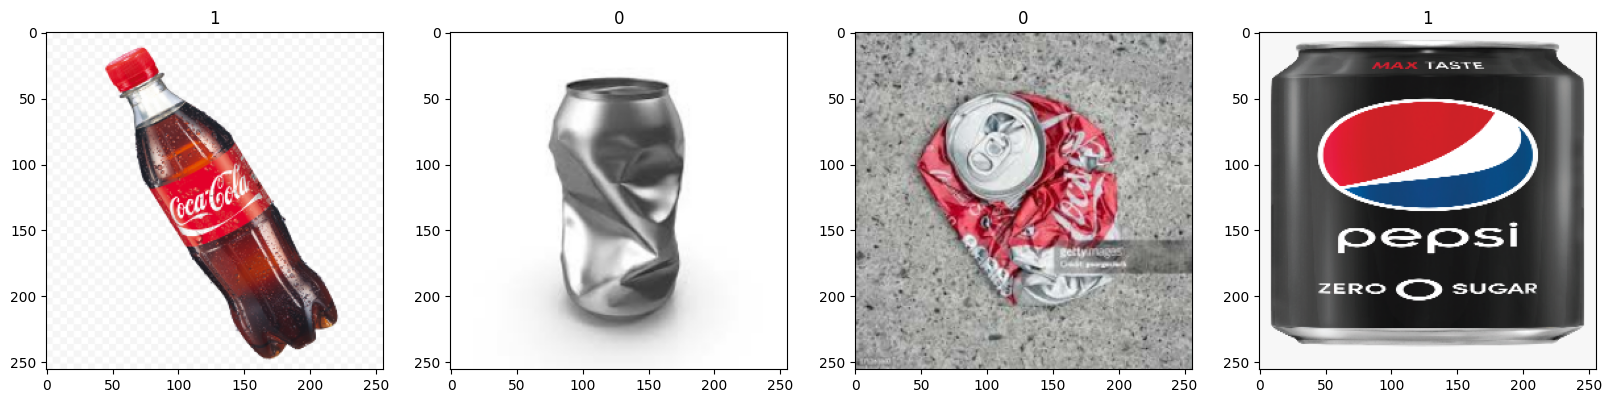

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Class 0 : Coca-Cola
Class 1 : Pepsi

In [15]:
### Data Scaling
data = data.map(lambda x, y: (x / 255, y))

In [16]:
data.as_numpy_iterator().next()

2024-04-24 23:11:28.577151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

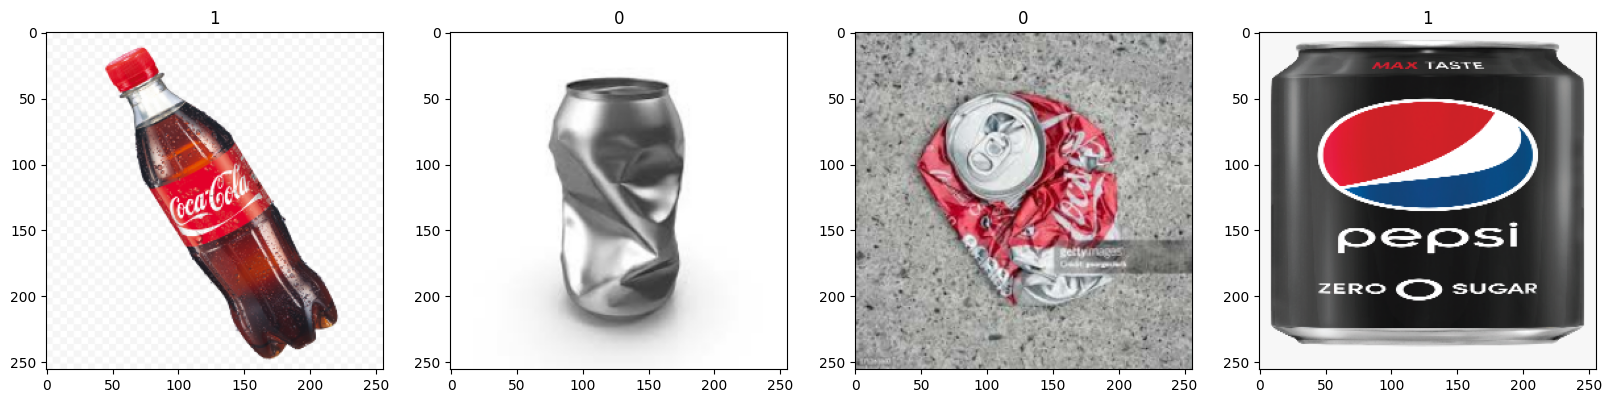

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
data_length = len(data)

In [19]:
train_size = int(data_length * 0.7)
val_size = int(data_length * 0.2)
test_size = data_length - train_size - val_size

In [20]:
train_size + val_size + test_size

21

In [21]:
val_size

4

In [22]:
test_size

3

In [23]:
train_size

14

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [25]:
len(test)

3

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential(
    [
        Conv2D(
            16, (3, 3), padding="same", activation="relu", input_shape=(256, 256, 3)
        ),
        MaxPooling2D(),
        Conv2D(32, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(16, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(256, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

# Compile the model (example)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)        0

In [27]:
logdir = "logs"

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(
    train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]
)

Epoch 1/20


2024-04-24 23:11:41.057299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-04-24 23:11:41.200497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/14 [=>............................] - ETA: 9s - loss: 0.7047 - accuracy: 0.5000

2024-04-24 23:11:41.447901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:41.565328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 2.6152 - accuracy: 0.4880

2024-04-24 23:11:42.069333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:42.315651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:42.424773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 91ms/step - loss: 2.4834 - accuracy: 0.4844 - val_loss: 0.7268 - val_accuracy: 0.4766
Epoch 2/20


2024-04-24 23:11:42.879199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.6514 - accuracy: 0.5781

2024-04-24 23:11:43.130528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:43.242336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.6357 - accuracy: 0.5889

2024-04-24 23:11:43.666202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:43.915662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:44.026419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 95ms/step - loss: 0.6342 - accuracy: 0.5915 - val_loss: 0.6185 - val_accuracy: 0.5938
Epoch 3/20


2024-04-24 23:11:44.437644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.5322 - accuracy: 0.7227

2024-04-24 23:11:44.687676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:44.800671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.5247 - accuracy: 0.7236

2024-04-24 23:11:45.227367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:45.477790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:45.589457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 96ms/step - loss: 0.5255 - accuracy: 0.7210 - val_loss: 0.4441 - val_accuracy: 0.8203
Epoch 4/20


2024-04-24 23:11:46.003098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.4378 - accuracy: 0.8125

2024-04-24 23:11:46.257401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:46.369637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.4258 - accuracy: 0.8221

2024-04-24 23:11:46.792303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:47.042828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:47.153673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 95ms/step - loss: 0.4366 - accuracy: 0.8192 - val_loss: 0.4001 - val_accuracy: 0.7969
Epoch 5/20


2024-04-24 23:11:47.569554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.3644 - accuracy: 0.8516

2024-04-24 23:11:47.826382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:47.938395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.3831 - accuracy: 0.8462

2024-04-24 23:11:48.365628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:48.618812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:48.733323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 102ms/step - loss: 0.3865 - accuracy: 0.8460 - val_loss: 0.2580 - val_accuracy: 0.9375
Epoch 6/20


2024-04-24 23:11:49.281863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.3577 - accuracy: 0.8164

2024-04-24 23:11:49.539151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:49.653418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.3302 - accuracy: 0.8438

2024-04-24 23:11:50.086314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:50.342612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:50.498291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 103ms/step - loss: 0.3385 - accuracy: 0.8438 - val_loss: 0.3181 - val_accuracy: 0.8594
Epoch 7/20


2024-04-24 23:11:50.949586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.2558 - accuracy: 0.9023

2024-04-24 23:11:51.210277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:51.327042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.2445 - accuracy: 0.9087

2024-04-24 23:11:51.769899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:52.026951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:52.139265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 98ms/step - loss: 0.2521 - accuracy: 0.9040 - val_loss: 0.2366 - val_accuracy: 0.9141
Epoch 8/20


2024-04-24 23:11:52.556828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.1741 - accuracy: 0.9375

2024-04-24 23:11:52.815795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:52.929747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.2284 - accuracy: 0.9135

2024-04-24 23:11:53.361513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:53.612255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:53.724210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 97ms/step - loss: 0.2227 - accuracy: 0.9152 - val_loss: 0.2490 - val_accuracy: 0.9062
Epoch 9/20


2024-04-24 23:11:54.154929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/14 [==============>...............] - ETA: 0s - loss: 0.1939 - accuracy: 0.9464

2024-04-24 23:11:54.415591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:54.531079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.2011 - accuracy: 0.9399

2024-04-24 23:11:54.978313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:55.232437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:55.342577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 98ms/step - loss: 0.1936 - accuracy: 0.9442 - val_loss: 0.1656 - val_accuracy: 0.9453
Epoch 10/20


2024-04-24 23:11:55.760325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.1375 - accuracy: 0.9688

2024-04-24 23:11:56.017119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:56.129049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.1938 - accuracy: 0.9423

2024-04-24 23:11:56.558093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:56.808729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:56.919062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 95ms/step - loss: 0.2007 - accuracy: 0.9397 - val_loss: 0.1748 - val_accuracy: 0.9219
Epoch 11/20


2024-04-24 23:11:57.334171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.1274 - accuracy: 0.9492

2024-04-24 23:11:57.589643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:57.701601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.1431 - accuracy: 0.9423

2024-04-24 23:11:58.129417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:58.381729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:58.492511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 95ms/step - loss: 0.1494 - accuracy: 0.9375 - val_loss: 0.1178 - val_accuracy: 0.9531
Epoch 12/20


2024-04-24 23:11:58.905347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.1131 - accuracy: 0.9609

2024-04-24 23:11:59.159470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:59.271845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.1285 - accuracy: 0.9591

2024-04-24 23:11:59.697468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:11:59.949228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:00.059331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 95ms/step - loss: 0.1345 - accuracy: 0.9554 - val_loss: 0.1649 - val_accuracy: 0.9531
Epoch 13/20


2024-04-24 23:12:00.473894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.0800 - accuracy: 0.9688

2024-04-24 23:12:00.732001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:00.844163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.1188 - accuracy: 0.9519

2024-04-24 23:12:01.270539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:01.521586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:01.631186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 95ms/step - loss: 0.1200 - accuracy: 0.9487 - val_loss: 0.3092 - val_accuracy: 0.8828
Epoch 14/20


2024-04-24 23:12:02.046858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.1368 - accuracy: 0.9492

2024-04-24 23:12:02.306184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:02.418433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.1726 - accuracy: 0.9399

2024-04-24 23:12:02.841504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:03.095118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:03.206156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 96ms/step - loss: 0.1644 - accuracy: 0.9442 - val_loss: 0.2064 - val_accuracy: 0.8984
Epoch 15/20


2024-04-24 23:12:03.625650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.1062 - accuracy: 0.9570

2024-04-24 23:12:03.882454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:03.995536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.1250 - accuracy: 0.9519

2024-04-24 23:12:04.421622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:04.673946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:04.784435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 96ms/step - loss: 0.1206 - accuracy: 0.9531 - val_loss: 0.1634 - val_accuracy: 0.9375
Epoch 16/20


2024-04-24 23:12:05.206834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.0665 - accuracy: 0.9688

2024-04-24 23:12:05.462699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:05.574451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.0775 - accuracy: 0.9663

2024-04-24 23:12:06.002008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:06.251469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:06.362174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 95ms/step - loss: 0.0755 - accuracy: 0.9665 - val_loss: 0.1358 - val_accuracy: 0.9531
Epoch 17/20


2024-04-24 23:12:06.768319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.1480 - accuracy: 0.9648

2024-04-24 23:12:07.023587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:07.134715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.1364 - accuracy: 0.9639

2024-04-24 23:12:07.560432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:07.818996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:07.930275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 96ms/step - loss: 0.1290 - accuracy: 0.9643 - val_loss: 0.1696 - val_accuracy: 0.9375
Epoch 18/20


2024-04-24 23:12:08.351245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.1458 - accuracy: 0.9688

2024-04-24 23:12:08.605976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:08.721598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.1211 - accuracy: 0.9760

2024-04-24 23:12:09.150164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:09.406022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:09.516933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 97ms/step - loss: 0.1247 - accuracy: 0.9732 - val_loss: 0.0858 - val_accuracy: 0.9609
Epoch 19/20


2024-04-24 23:12:09.941268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.0911 - accuracy: 0.9648

2024-04-24 23:12:10.199509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:10.314950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.2607 - accuracy: 0.9375

2024-04-24 23:12:10.751806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:11.010295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:11.122782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 99ms/step - loss: 0.2831 - accuracy: 0.9330 - val_loss: 1.7727 - val_accuracy: 0.6719
Epoch 20/20


2024-04-24 23:12:11.555668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/14 [================>.............] - ETA: 0s - loss: 0.4990 - accuracy: 0.8672

2024-04-24 23:12:11.815409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:11.928959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/14 [==========================>...] - ETA: 0s - loss: 0.4356 - accuracy: 0.8798

2024-04-24 23:12:12.361592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:12.615624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 23:12:12.727811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - 2s 96ms/step - loss: 0.4573 - accuracy: 0.8728 - val_loss: 0.9102 - val_accuracy: 0.7344


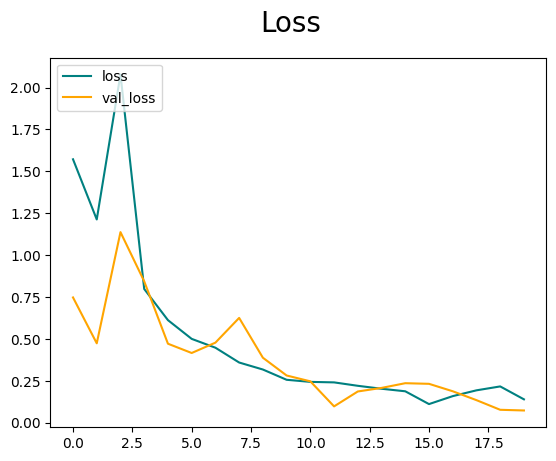

In [39]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

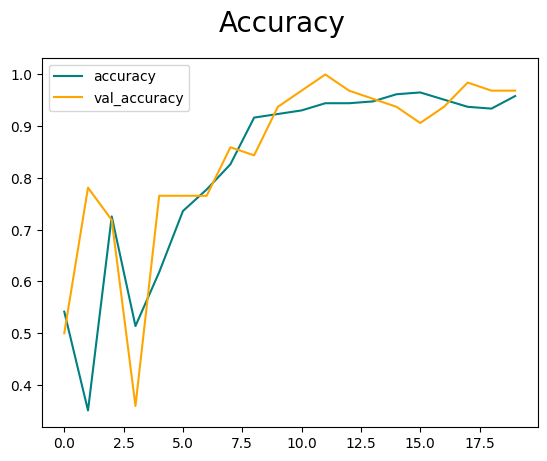

In [40]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-04-24 21:43:43.611326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:43.681588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:43.806892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 1s 532ms/step


In [44]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9130435, shape=(), dtype=float32) tf.Tensor(0.97849464, shape=(), dtype=float32)


In [45]:
import cv2

In [57]:
def capture_image_from_camera(file_path):
    # Start the camera
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        return

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Display the resulting frame
        cv2.imshow("Press Space to capture", frame)

        # Press 'Space' to save the image and exit
        if cv2.waitKey(1) == ord(" "):
            cv2.imwrite(file_path, frame)  # Save the frame as an image file
            print(f"Image saved to {file_path}")
            break

    # When everything done, release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()


# Path where the image will be saved
image_path = "your_image_path_here.jpg"
capture_image_from_camera(image_path)

Image saved to your_image_path_here.jpg


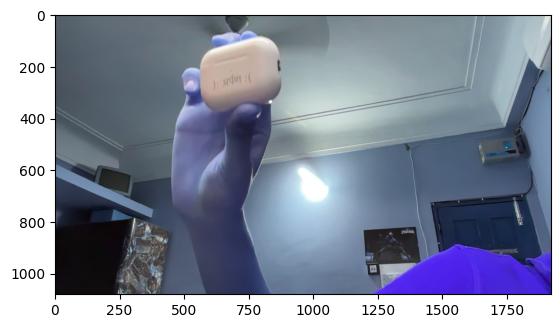

In [58]:
img = cv2.imread("your_image_path_here.jpg")
plt.imshow(img)
plt.show()

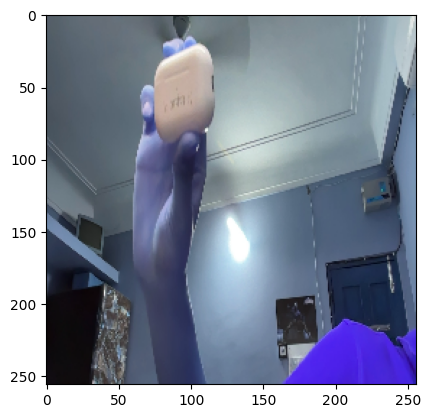

In [59]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:
sol = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 12ms/step


In [61]:
if sol > 0.5:
    print(f"Predicted class is Coke")
else:
    print(f"Predicted class is Pepsi")

Predicted class is Coke


In [64]:
import cv2
import numpy as np


def capture_image_from_camera(file_path):
    # Start the camera
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        return None

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Display the resulting frame
        cv2.imshow("Press Space to capture", frame)

        # Press 'Space' to save the image and exit
        if cv2.waitKey(1) == ord(" "):
            cv2.imwrite(file_path, frame)  # Save the frame as an image file
            print(f"Image saved to {file_path}")
            break

    # When everything done, release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()
    return frame


def measure_can_height(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect edges using Canny
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(
        edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Assume the largest contour is the can
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        return h  # Height of the can in pixels

    return None


# Path where the image will be saved
image_path = "your_image_path_here.jpg"
image = capture_image_from_camera(image_path)
if image is not None:
    height = measure_can_height(image)
    if height is not None:
        print(f"Measured height of the can in pixels: {height}")
    else:
        print("Can not detected.")

Image saved to your_image_path_here.jpg
Measured height of the can in pixels: 88


In [62]:
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join("models", "imageclassifier.h5"))

/Users/arpansethi/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
